In [1]:
#Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

#dataset split
from sklearn.model_selection import train_test_split

#PREPROCESSING THE DATA
from sklearn.preprocessing import LabelEncoder

#balancing the dataset
from imblearn.over_sampling import SMOTE

#ml models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#hyper_parameters
from sklearn.model_selection import GridSearchCV

#cross_val_score
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import pickle as pk


#api
import requests

In [2]:
#PATH TO THE FILE
path = 'churn.csv'

#LOAD DATA
data = pd.read_csv(path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#DATA INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***DATA CLEANING***

In [4]:
#LOOKING FOR NAN VALUES
print('missing values')
print(data.isna().sum())
print("*****************")

#LOOKING FOR DUPLICATED ROWS
print('duplicated rows')
print(data.duplicated().sum())

missing values
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
*****************
duplicated rows
0


***HYPOTESIS VALIDATION AND DATA EXPLORATION***

***1 - 30 % of the customers under 28 years are more likely to be a churn*** False, just 7% are more likely to be a churn

0    0.928431
1    0.071569
Name: Exited, dtype: float64


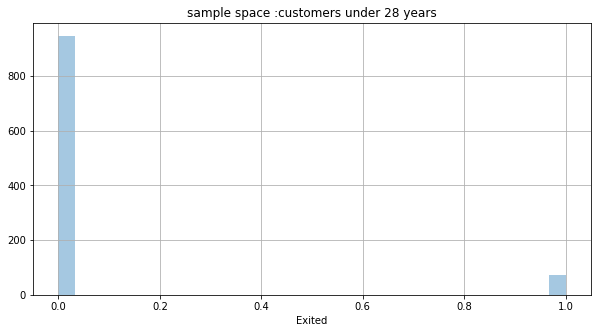

In [7]:
filter_age = data[(data['Age']<28)]
print(filter_age.Exited.value_counts(normalize=True))

#graph
plt.figure(figsize=(10,5))
plt.title('sample space :customers under 28 years')
sn.distplot(filter_age.Exited,kde=False)
plt.grid()

***2 - 46 % of custumers than have a Credit Score less than 50% of the mean are more likely to be a churn***False, just 21% are more likely to be a churn

0    0.785902
1    0.214098
Name: Exited, dtype: float64


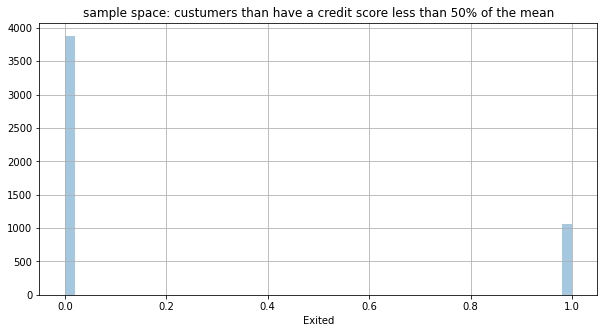

In [8]:
#mean of the Credit score
Credit_score_mean = data.CreditScore.mean()
filter_Credit_score = data[(data.CreditScore < Credit_score_mean)]
print(filter_Credit_score.Exited.value_counts(normalize=True))

#graph
plt.figure(figsize=(10,5))
plt.title('sample space: custumers than have a credit score less than 50% of the mean')
sn.distplot(filter_Credit_score.Exited,kde=False)
plt.grid()

***3 - more than 25 % of customers that have at least two product are less likely to be a churn***True, if they have at least 2 products they are 81% less likely to be a churn

0    0.818379
1    0.181621
Name: Exited, dtype: float64


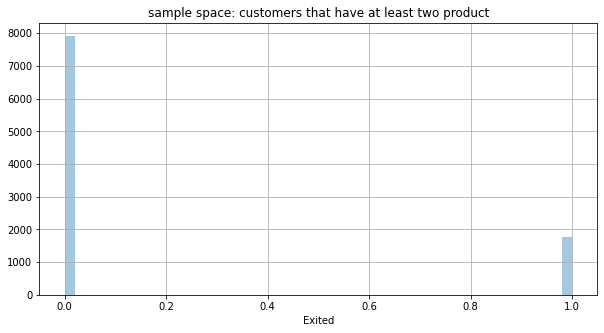

In [9]:
filter_number_products = data[(data.NumOfProducts<=2)]
print(filter_number_products.Exited.value_counts(normalize=True))

#graph
plt.figure(figsize=(10,5))
plt.title('sample space: customers that have at least two product')
sn.distplot(filter_number_products.Exited,kde=False)
plt.grid()

***4 - 45 % of customers than have the Estimated Salary more than 60% of the mean are note likely to be churn***True, if they has more than 60% of salary are not likely they will churn

0    0.783593
1    0.216407
Name: Exited, dtype: float64


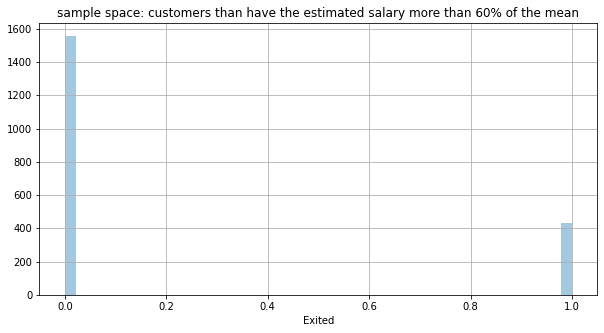

In [10]:
#more than 60% of the mean
more_than_60 = (data.EstimatedSalary.mean()+data.EstimatedSalary.mean()*0.6)
filter_estimated_salary = data[(data.EstimatedSalary>more_than_60)]
print(filter_estimated_salary.Exited.value_counts(normalize=True))

#graph
plt.figure(figsize=(10,5))
plt.title('sample space: customers than have the estimated salary more than 60% of the mean')
sn.distplot(filter_estimated_salary.Exited,kde=False)
plt.grid()

***5 -  less than 15 % of the customers are churn***False, more than 20% of the custumers are a churn

0    0.7963
1    0.2037
Name: Exited, dtype: float64


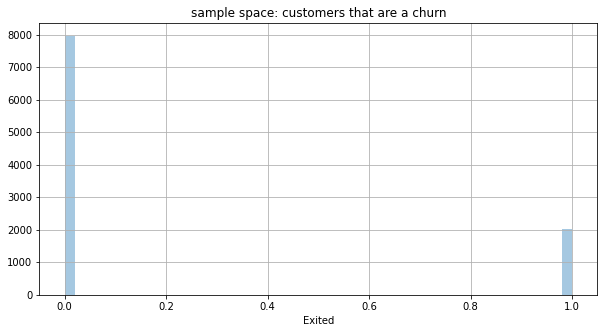

In [11]:
print(data.Exited.value_counts(normalize=True))

#graph
plt.figure(figsize=(10,5))
plt.title('sample space: customers that are a churn')
sn.distplot(data.Exited,kde=False)
plt.grid()

 ***What is TopBank's current Churn rate?***

0    0.7963
1    0.2037
Name: Exited, dtype: float64


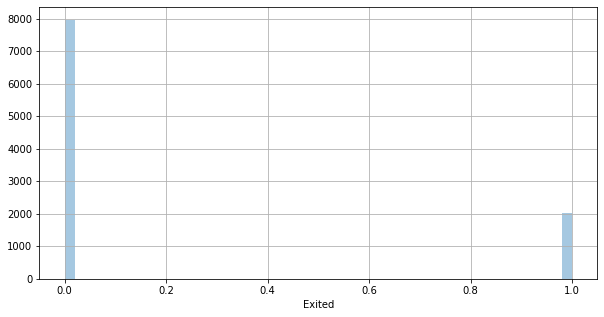

In [12]:
print(data.Exited.value_counts(normalize=True))
#graph
plt.figure(figsize=(10,5))
sn.distplot(data.Exited,kde=False)
plt.grid()

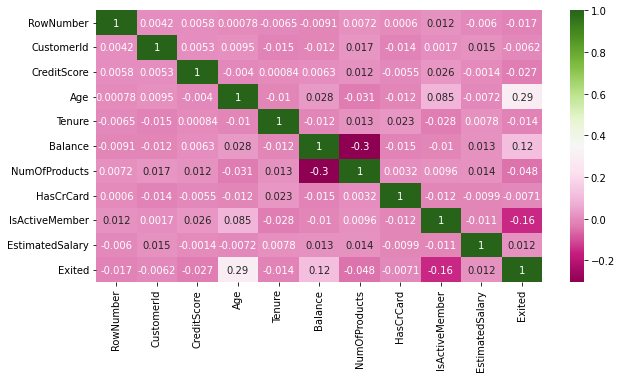

In [68]:
#CORRELATIONSHIP GRAPH
plt.figure(figsize=(10,5))
sn.heatmap(data.corr(),cmap='PiYG',annot=True)
plt.show()

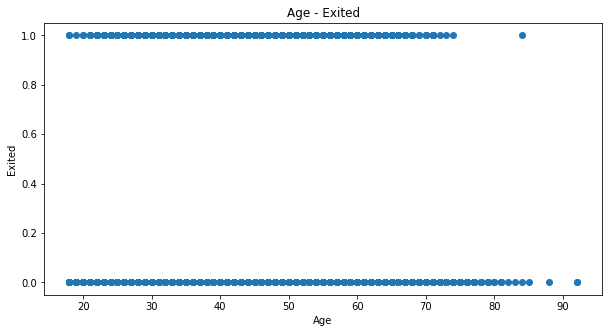

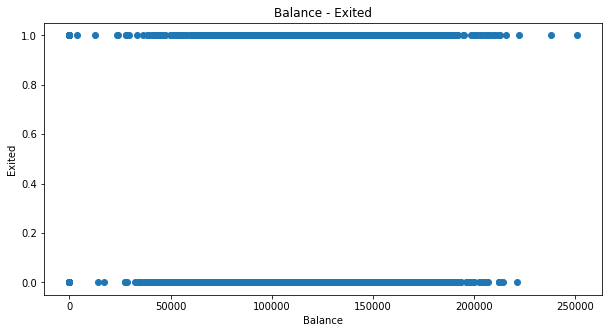

In [69]:
#DISTRIBUTION WITH THE VARIABLES THAT MOST CORRELATE WITH CUSTOMER CHURN

# Age - Balance
plt.figure(figsize=(10,5))
plt.scatter(data['Age'],data['Exited'])
plt.title('Age - Exited')
plt.xlabel('Age')
plt.ylabel('Exited')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(data['Balance'],data['Exited'])
plt.title('Balance - Exited')
plt.xlabel('Balance')
plt.ylabel('Exited')

plt.show()


***DATA PREPARATION***

In [14]:
#FUNCTION TO DELETE COLUMNS ARE USEFUL AND POSSIBLE PRE PROCESSING
def data_preparation(data):
    data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
    return data

In [15]:
#USING THE DATA_PREPARATION FUNCTION
data = data_preparation(data)

#BINARINZING SOME CATEGORICAL COLUMNS -- INSTANTING THE PREPROCESSING CLASS
LE = LabelEncoder()

#METHOD FIT_TRANSFORM TO BINARIZING
data['Gender'] = LE.fit_transform(data['Gender'])
data['Geography'] = LE.fit_transform(data['Geography'])

#DROP THE TARGET COLUMN
x = data.drop('Exited',axis=1)
y = data['Exited']


#BALANCING THE DATASET USING THE TARGET COLUMN AS A REFERENCE - INSTANTING THE BALANCING CLASS
over_sampling = SMOTE()

x_dummies,y_dummies = over_sampling.fit_resample(x,y)

In [16]:
#COUNT
print(x_dummies.shape)
print(y_dummies.shape)

(15926, 10)
(15926,)


In [17]:
###################################################################################

In [18]:
#TRAINING AND TESTING THE MODEL WITH CROSS VALIDATION TO SEE WHICH IS THE BEST ONE
Models = []
Scores = []
knc = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()
gs = GaussianNB()
clf = LogisticRegression()
gnb = GaussianNB()
scf = SGDClassifier()
rfc = RandomForestClassifier()

models = [knc,dtc,gs,clf,gnb,scf,rfc]

for model in models:
    score = cross_val_score(model,x_dummies,y_dummies)
    print('{} score: {}'.format(model, score.mean()))
    Models.append(model)
    Scores.append(score.mean())

KNeighborsClassifier() score: 0.6881203380961249
DecisionTreeClassifier() score: 0.7870822603994517
GaussianNB() score: 0.720647455853267
LogisticRegression() score: 0.6742443638327416
GaussianNB() score: 0.720647455853267
SGDClassifier() score: 0.48517883873816076
RandomForestClassifier() score: 0.858099377082428


In [19]:
#DICTIONARY WITH THE MODEL AND THEIR SCORES
Models_score = {'KNeighborsClassifier':0.68,'DecisionTreeClassifier':0.78,'GaussianNB':0.71,'LogisticRegression':0.67
               ,'GaussianNB':0.71,'SGDClassifier':0.51,'RandomForestClassifier':0.85}

***MODEL PERFORMANCE GRAPH***

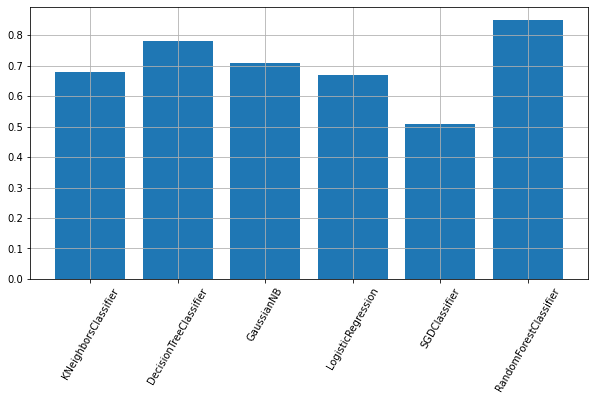

In [20]:
#GRAPH WITH THE SCORE OF THE MODELS
plt.figure(figsize=(10,5))
plt.bar(Models_score.keys(),Models_score.values())
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [16]:
#FIGURING OUT THE BEST PARAMETERS OF THE BEST MODEL
parameters = {'n_estimators':[100,200,300,400],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}

#BEST MODEL
rfc = RandomForestClassifier()

#SEARCH GRID DEFINITION
clf = GridSearchCV(rfc, parameters)
clf.fit(x_dummies,y_dummies)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300}


In [ ]:
######################################################################################

***ML MODELS AND HYPERPARAMETERS***

In [27]:
#--0BEST MODEL - RandomForestClassifier 

#--BEST PARAMETERS -{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300}

In [17]:
#TESTING THE HYPERPARAMETERS
rfc = RandomForestClassifier(criterion='entropy',max_features= 'auto',n_estimators= 300)

score = cross_val_score(rfc,x_dummies,y_dummies)
print('{} score: {}'.format(rfc, score.mean()))

RandomForestClassifier(criterion='entropy', n_estimators=300) score: 0.8542693357221202


***MODEL PERFORMANCE***

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_dummies,y_dummies,test_size=0.2,random_state=42)

In [20]:
#TRAIN
rfc.fit(x_train,y_train)

#PREDICT
pred = rfc.predict(x_test)

#CLASSIFICATION REPORT
print(classification_report(y_test,pred,target_names=['NO CHURN','CHURN']))

              precision    recall  f1-score   support

    NO CHURN       0.88      0.85      0.86      1633
       CHURN       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [21]:
#TRAINING THE MODEL TO PUT IN THE PKL FILE
model = rfc.fit(x_dummies,y_dummies)

#PATH TO SAVE THE PKL FILE ------take

#SAVING THE MODEL ----------take
pk.dump(model, open('model.pkl','wb'))


***API ACCESS***

In [107]:
#IMPUT THE ORIGINAL DATA
path = 'churn.csv'
data = pd.read_csv(path)

#DROP THE EXIET COLUMN
data.drop('Exited',axis=1,inplace=True)

#CONVERT TO JSON
df_json = data.sample().to_json(orient='records')

In [108]:
df_json

'[{"RowNumber":1136,"CustomerId":15656121,"Surname":"Medvedeva","CreditScore":733,"Geography":"Germany","Gender":"Male","Age":31,"Tenure":6,"Balance":157791.07,"NumOfProducts":2,"HasCrCard":0,"IsActiveMember":0,"EstimatedSalary":177994.81}]'

In [109]:
#MAKING A REQUEST - HAVE TO RUN THE API BEFORE OF EXECUTING THIS LINE OF CODE

#-- METHOD POST TO SEND DATA TO THE MODEL IN PRODUCTION
url = 'http://your ip address:5000/predict'
data = df_json
header = {'Content-type':'application/json'}

r = requests.post(url = url,data=data,headers = header)

In [110]:
result = pd.DataFrame(r.json())

In [111]:
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,prediction,churn probability
0,733,0,0,31,6,157791.07,2,0,0,177994.81,1,0.546667


***MONEY***

In [77]:
#VALUES THAT BANKS ACHIEVE ANNUALLY BASED ON THE SALARY OF CUSTOMERS THAT BECAME CHURN

#-- SALARIES HIGHER THAN AVERAGE HAVE 20% ANNUAL RATE ON SALARY VALUES
salary_deduction20 = data[(data.EstimatedSalary > data.EstimatedSalary.mean()) & data.Exited==1]

#-- SALARIES LOWER THAN THE MEDIA HAS 15% ANNUAL RATE ON SALARY VALUES
salary_deduction15 = data[(data.EstimatedSalary < data.EstimatedSalary.mean()) & data.Exited==1]

In [83]:
print('NUMBER OF CUSTOMERS WITH SALARIES HIGHER THAN AVERAGE: ',len(salary_deduction20))
print('NUMBER OF CUSTOMERS WITH SALARIES LESS THAN AVERAGE: ',len(salary_deduction15))

NUMBER OF CUSTOMERS WITH SALARIES HIGHER THAN AVERAGE:  1042
NUMBER OF CUSTOMERS WITH SALARIES LESS THAN AVERAGE:  995


In [79]:
#20% of sums of all salaries of clients who have churn
#that is, how much the company lost with the churns

sum20 = (20*salary_deduction20['EstimatedSalary'].sum())/100

#15% of sums of all salaries of clients who have churn

sum15 = (15*salary_deduction15['EstimatedSalary'].sum())/100

print('sum 20%:',sum20)
print('sum 15%:',sum15)
print('total:',sum20+sum15)

sum 20%: 31373947.456
sum 15%: 7472377.177499998
total: 38846324.633499995


***amount that the bank loses annually with the annual churn of customers with higher-than-average salaries - 31.373,947***


***amount that the bank loses annually with the annual churn of customers with salaries lower than the average - 7.472,377***


***amount the bank lost annually from all churn customers - 38.846,324***


***HOW MUCH WILL THIS DECREASE WITH THE USE OF THE MODEL (5% decrease which is the difference between the model's accuracy and the current % of churn- 1.942,316***


***HOW MUCH THE BANK WILL CONTINUE TO LOSE WITH THE MODEL - 36.904,008 (STILL STUDYING HOW TO IMPROVE THE MODEL AND REDUCE THIS LOSS)***

In [81]:
performance = {'WITHOUT MODEL':38.846,'WITH MODEL':36.904}

WITHOUT MODEL: 38.846
WITH MODEL: 36.904
5% REDUCTION: 1.942 316


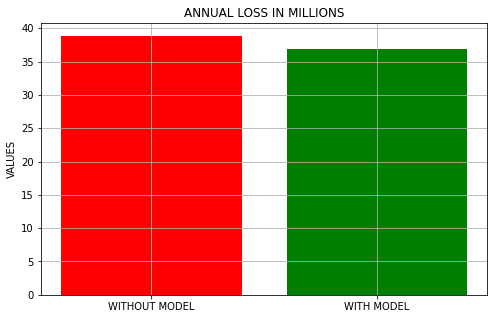

In [82]:
print('WITHOUT MODEL:',38.846)
print('WITH MODEL:',36.904)
print('5% REDUCTION:',1.942,316)
plt.figure(figsize=(8,5))
plt.bar(performance.keys(),performance.values(),color = ['red','green'])
plt.title('ANNUAL LOSS IN MILLIONS')
plt.ylabel('VALUES')
plt.grid()

plt.show()